In [1]:
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols

# 👩‍💻 Workbook 02: String and list manipulation

This workbook is about learning how to manually manipulate string data that is read from files.

To do this, you will be reading data from three files: "beam_1.txt", "beam_2.txt", and "beam_3.txt".

The file format of each text file is as follows. Values shown in square brackets `[]` are optional data and may or may not appear in the file.

```python
Length, [E, I] # Line 0
Support locations # Line 1
Load Magnitude, Load Start, Load Order, [Load End] # Line 2
Load Magnitude, Load Start, Load Order, [Load End] # Line 3 ...
... # etc.
```

All the lines below the first two lines will be loads. There can be zero, one, or many lines of loads.


## Task A

Use the "file opening" template to open the file, "beam_1.txt". Assign the `file.read()` data to a variable named `beam_1_data`. Use `print()` to print `beam_1_data` to the notebook.

Review the description of the file format above and mentally identify each piece of data in the file with what it represents in the description of the file format.

Do the same with "beam_2.txt", except with a variable called `beam_2_data`, after you print it to the notebook, also.

## Task A response

In [2]:
file_name = "beam_1.txt" # Same dir as notebook file
with open(file_name, 'r') as file:
    beam_1_data = file.read()
    
print(beam_1_data)

4800
0, 3000
10, 2000, 0


In [3]:
file_name = "beam_2.txt" # Same dir as notebook file
with open(file_name, 'r') as file:
    beam_2_data = file.read()
    
print(beam_2_data)

228, 28000, 756
63, 100, 200
15, 0, 0
35, 0, 0


# Task B

Use `.split()` to split the string in `beam_1_data` into separate lines. Access each line in the resulting list by using indexing and print each line to the notebook separately.

Following that, if you see that any of the lines in the list is a string with comma-separated values, split those values up into another list by splitting that line with `.split()` using the appropriate character sequence.

## Task B response

In [4]:
beam_1_lines = beam_1_data.split("\n")
print(beam_1_lines[0])
print(beam_1_lines[1])
print(beam_1_lines[2])

4800
0, 3000
10, 2000, 0


# Task C

Using a combination of splitting and indexing, assign each piece of data in the file to an appropriately named variable.

For example, you might extract the length from the file and assign it to a variable called `length`. If there are two support locations, they could be `support_location_1` and `support_location_2`, etc.

Try reducing the amount you have to type by assigning intermediary values (e.g. the list of split lines) to intermediary variable names.

Check the type of your variables by printing the result of `type(<variable_name>)`. Are your "numbers" numbers?

You can convert strings of integers to actual integers by using the `int()` function. 

e.g. 
```python
length = int(length)
```


## Task C response

In [5]:
length = int(beam_1_lines[0])
supports = beam_1_lines[1].split(", ")
support_location_1 = int(supports[0])
support_location_2 = int(supports[1])

print(type(length), length)
print(type(supports), supports)
print(type(support_location_1), support_location_1)
print(type(support_location_2), support_location_2)

<class 'int'> 4800
<class 'list'> ['0', '3000']
<class 'int'> 0
<class 'int'> 3000


# Task D

By combining the work you have done in the cells above, copy-and-paste them into the cell below to create the beginning of a script to read beam data from a text file and then create a `Beam` object with `sympy`.

Feel free to refer back to your Workbook 01 and the sympy beam reference guide.

Putting it all together, you will be performing the following:

1. Read the contents of the file using `.read()` and store the resulting string in a variable called `beam_1_data`.
2. Using the information about the file format described above, use string methods, list methods, and indexing to extract data from the file. Create the following variables:
* `length`
* `E`
* `I`
    * If `E` and `I` are not in the file, create and assign `E` and `I` as sympy symbols.
* Supports
    * Create separate variables for each support location, e.g. `support_location_1`, `support_location_2`, etc.
    * `support_location_...`
* Loads
    * Create separate variables for each load, e.g. `load_magnitude_1`, `load_magnitude_2`, etc.
    * `load_magnitude_...`
    * `load_start_...`
    * `load_order_...`
    * `load_end_...` (if applicable)

3. Create a new `Beam` object using the variables containing the data you read from the file. **Assume all supports are vertical point loads supports.** _Remember_, in addition to creating a sympy `symbol` for each unknown, you will also need to create a `.bc_deflection` list of restraints (refer to your Workbook 01 and the sympy beams reference guide).

4. Solve the `Beam` for reaction loads. Print reaction loads, plot the shear force and bending moment diagrams. If `E` and `I` are in the file, also plot the displacement.

## Beam: Two supports, one load

<class 'int'> 4800
<class 'list'> ['0', '3000']
<class 'int'> 0
<class 'int'> 3000
{R1: 11200/3, R2: -95200/3}


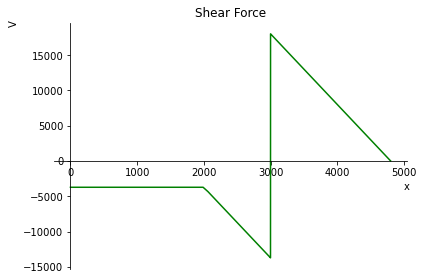

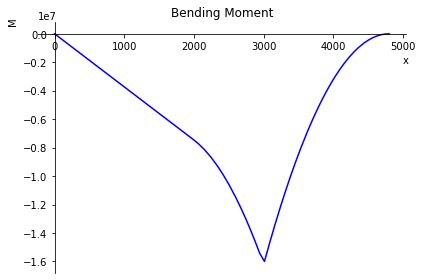

In [6]:
with open("beam_1.txt", 'r') as file:
    beam_1_data = file.read()
    
b1_lines = beam_1_data.split("\n")
    
length = int(beam_1_lines[0])

supports = beam_1_lines[1].split(", ")

support_location_1 = int(supports[0])
support_location_2 = int(supports[1])

load_magnitude_1 = b1_lines[2].split(",")[0]
load_start_1 = b1_lines[2].split(",")[1]
load_order_1 = b1_lines[2].split(",")[2]

load_magnitude_1 = int(load_magnitude_1)
load_start_1 = int(load_start_1)
load_order_1 = int(load_order_1)

E, I = symbols("E I")
R1, R2 = symbols("R1 R2")

b1_beam = Beam(length, E, I)
b1_beam.apply_load(R1, support_location_1, -1)
b1_beam.apply_load(R2, support_location_2, -1)
b1_beam.apply_load(load_magnitude_1, load_start_1, load_order_1)
b1_beam.bc_deflection = [(support_location_1, 0), (support_location_2, 0)]

b1_beam.solve_for_reaction_loads(*[R1, R2])
print(b1_beam.reaction_loads)
b1_beam.plot_shear_force()
b1_beam.plot_bending_moment()

## Task 01 Response

# Task E

Perform the same instructions from **Task 1** with "beam_2.txt" except call your variable `beam_2_data`.

Save yourself some time by copy-and-paste-ing your code from **Task D** and try modifying it to make it work. Note, the number of supports and number of loads are different in "beam_2.txt".

## Beam: Three supports, two loads

{R1: -6016.78462221345, R2: -1561.00506756757, R3: -3822.21031021898}


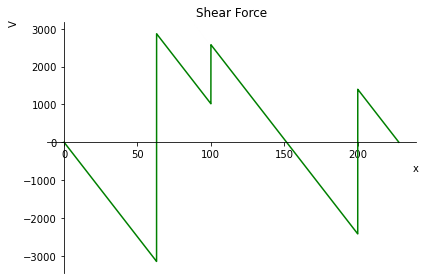

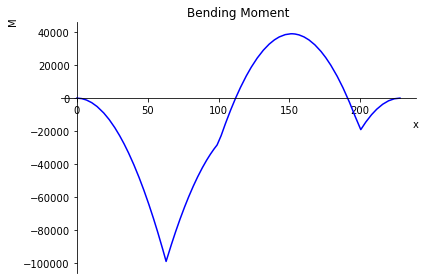

In [8]:
with open("beam_2.txt", 'r') as file:
    beam_2_data = file.read()
    
b2_lines = beam_2_data.split("\n")
    
length, E, I = b2_lines[0].split(", ")
length = int(length)

support_location_1 = b2_lines[1].split(", ")[0]
support_location_2 = b2_lines[1].split(",")[1]
support_location_3 = b2_lines[1].split(", ")[2]

support_location_1 = int(support_location_1)
support_location_2 = int(support_location_2)
support_location_3 = int(support_location_3)

load_magnitude_1 = b2_lines[2].split(",")[0]
load_start_1 = b2_lines[2].split(",")[1]
load_order_1 = b2_lines[2].split(",")[2]

load_magnitude_1 = float(load_magnitude_1)
load_start_1 = int(load_start_1)
load_order_1 = int(load_order_1)

load_magnitude_2 = b2_lines[3].split(",")[0]
load_start_2 = b2_lines[3].split(",")[1]
load_order_2 = b2_lines[3].split(",")[2]

load_magnitude_2 = float(load_magnitude_2)
load_start_2 = int(load_start_2)
load_order_2 = int(load_order_2)


R1, R2, R3 = symbols("R1 R2 R3")

b2_beam = Beam(length, E, I)
b2_beam.apply_load(R1, support_location_1, -1)
b2_beam.apply_load(R2, support_location_2, -1)
b2_beam.apply_load(R3, support_location_3, -1)
b2_beam.apply_load(load_magnitude_1, load_start_1, load_order_1)
b2_beam.apply_load(load_magnitude_2, load_start_2, load_order_2)
b2_beam.bc_deflection = [(support_location_1, 0), (support_location_2, 0), (support_location_3, 0)]

b2_beam.solve_for_reaction_loads(*[R1, R2, R3])
print(b2_beam.reaction_loads)
b2_beam.plot_shear_force()
b2_beam.plot_bending_moment()

# Task F

1. Make a duplicate of the file "beam_1.txt" and call it "beam_3.txt". 
2. Make a duplicate of "beam_2.txt" and call it "beam_4.txt"
3. Rename the title of **Task D Response** to **Beam: Two supports, one load**
4. Rename the title of **Task E Response** to **Beam: Three supports, two loads**
5. Change some of the values in "beam_3.txt" and change your "Two supports, one load" script to run the data in "beam_3.txt" to see some new results
6. Do the same with "beam_4.txt" and "Three supports, two loads" to see some new results
7. Now, try running your "beam_1.txt" on your "Three supports, two loads" script. Did it work? What happened?
8. Try to run your "beam_4.txt" on your "Two supports, one load". Did it work? What happened?
9. Ponder the question: "Is there some way to write _one_ script that would work with _all_ beam files"?

# 🦸‍ Submit Workbook 02
Whew! Congratulations on getting through Workbook 02. Was some of that work repetitive?  Maybe you started asking yourself, "Is there a better way to do this?"

Well...yes, there is. We will start on that next week.

For now, just email your completed workbook to me at `cferster@rjc.ca` with the subject line `Workbook 02 Submission`

Oh, but if you are keen, I have also included a "Workbook_02 Extra Practice" notebook if you wanted to practice more but with non-structural exercises.